In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from pprint import pprint 
import seaborn as sns 
from matplotlib import collections as mc 
%matplotlib inline 
np.random.seed(sum(map(ord, "aesthetics"))) 
sns.set_context('notebook') 
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x=np.array(range(1,100))
x=x[:, np.newaxis]

#Define y as a function of X and introduce some noise so we get nice plots.
y=10+2*x.ravel()
y=y+np.random.normal(loc=0, scale=70, size=99)

In [3]:
#Instantiate, fit and predict y~x
lin=LinearRegression()
lin.fit(x,y)
y_pred=lin.predict(x)

In [4]:
def plotline(x1,y1,x2,y2,c,l):
    plt.scatter(x1, y1, color='black')
    plt.plot(x2, y2, color=c, linewidth=l)
    plt.axis('tight')
    plt.xlabel('x')
    plt.ylabel('y')
    sns.despine(offset=10, trim=True)

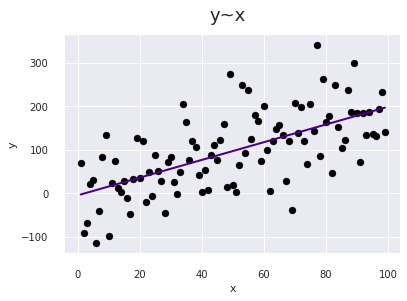

In [5]:
plotline(x,y,x,y_pred,'indigo',2) 
plt.suptitle('y~x',fontsize=18)
plt.show()

In [6]:
#Reshape y so sklearn doesn't cry foul
y=y[:,np.newaxis]

#Instantiate, fit and predict x~y
lin=LinearRegression()
lin.fit(y,x)
x_pred=lin.predict(y)

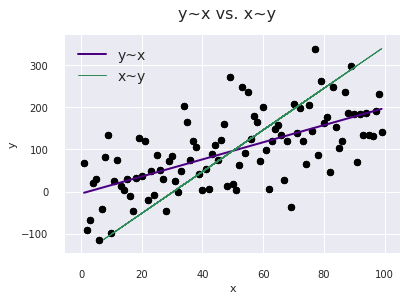

In [7]:
def onevstwo():
    plotline(x,y,x,y_pred,'indigo',2)
    plotline(x,y,x_pred,y,'seagreen',1)
    plt.suptitle('y~x vs. x~y',fontsize=16)
    plt.legend(['y~x','x~y'], loc='best', fontsize=14)

onevstwo()
plt.show()

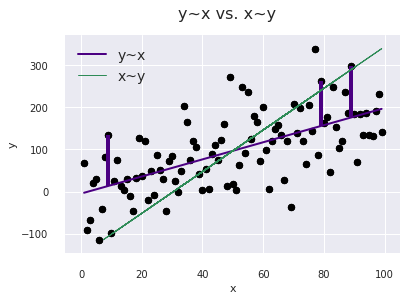

In [8]:
#Let's flatten our arrays so it's easier to plot
x,x_pred,y,y_pred=x.ravel(),x_pred.ravel(),y.ravel(),y_pred.ravel()

#Grab some indices where the difference between y and y_pred is the greatest.
indices=np.argsort(y-y_pred)[-8:-5]

#Plot some sample y-ypred in the earlier plot
onevstwo()
lines=[[(x[i],y[i]), (x[i],y_pred[i])] for i in indices]
lines=mc.LineCollection(lines, colors='indigo', linewidths=4)
plt.gca().add_collection(lines)
plt.show()

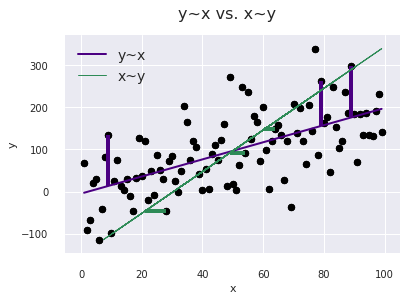

In [9]:
#Grab some indices where the difference between x and x_pred is the greatest.
indices_r=np.argsort(x-x_pred)[-40:-37]

#Plot some sample y-y_pred in the earlier plot
onevstwo()
lines=[[(x[i],y[i]), (x[i],y_pred[i])] for i in indices]
lines=mc.LineCollection(lines, colors='indigo', linewidths=4)
plt.gca().add_collection(lines)

#Plot some sample x-x_pred as well
lines=[[(x[i],y[i]), (x_pred[i],y[i])] for i in indices_r]
lines=mc.LineCollection(lines, colors='seagreen', linewidths=4)
plt.gca().add_collection(lines)
plt.show()

In [10]:
#Combine x and y 
xy=np.array([x,y]).T

In [11]:
#Instantiate a PCA model, the run fit_transform to xy followed by inverse_transform
pca=PCA(n_components=1)
xy_pca=pca.fit_transform(xy)
xy_n=pca.inverse_transform(xy_pca)

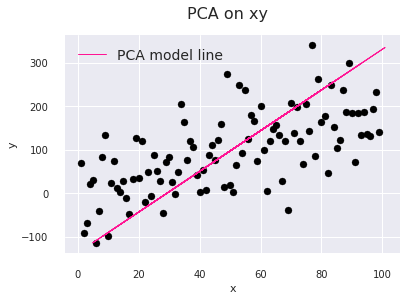

In [12]:
#Plot xy against xy_n. Note that we're simply passing x and y to the function since xy=x+y.
plotline(x,y,xy_n[:,0],xy_n[:,1],'deeppink',1)
plt.suptitle('PCA on xy',fontsize=16)
plt.legend(['PCA model line'], loc='best', fontsize=14)
plt.show()

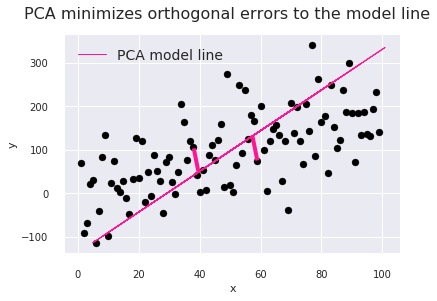

In [13]:
#Replot the PCA line so we can examine
plotline(x,y,xy_n[:,0],xy_n[:,1],'deeppink',1)

#Plot some sample values to demonstrate PCA
lines=[[(38.1, 102.9), (39.6,50)], [(58.95,75), (57.3, 133)]]
lines=mc.LineCollection(lines, colors='deeppink', linewidths=4)
plt.gca().add_collection(lines)
plt.suptitle('PCA minimizes orthogonal errors to the model line',fontsize=16)
plt.legend(['PCA model line'], loc='best', fontsize=14)
plt.show()

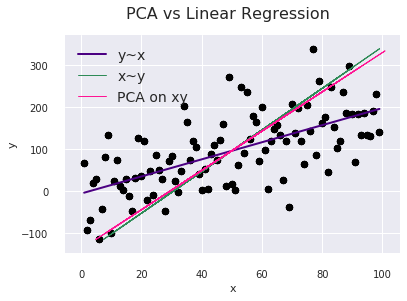

In [14]:
#Plot y~x vs x~y
onevstwo()

#Plot PCA model lines
plotline(x,y,xy_n[:,0],xy_n[:,1],'deeppink',1)
plt.suptitle('PCA vs Linear Regression',fontsize=16)
plt.legend(['y~x', 'x~y', 'PCA on xy'], loc='best', fontsize=14)
plt.show()